flow
Import my dataset
train it on simple logistic regression,svc,dt,randomforest get confusion matrix
then give weights to log regression in tupple to all
Use Balanced Random forest
Smota
upsampling
undersampling

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier

In [16]:
df = pd.read_csv('/content/Titanic.csv')

In [17]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [18]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [19]:
df.shape

(891, 6)

In [20]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[88 17]
 [19 55]]
0.7988826815642458


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

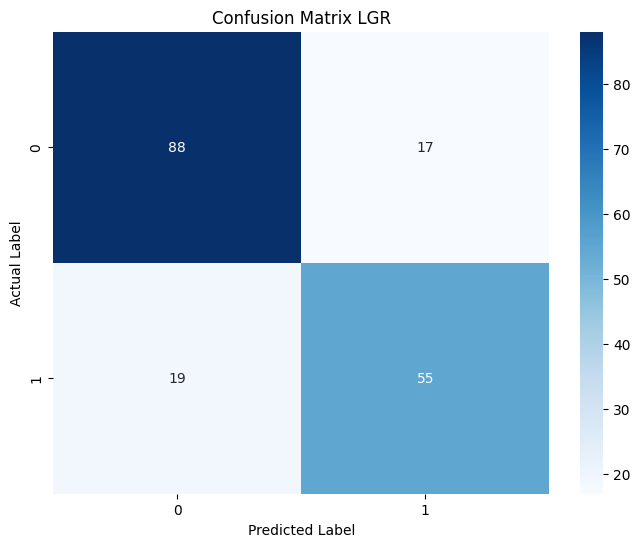

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix LGR')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [25]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[99  6]
 [56 18]]
0.6536312849162011


In [26]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[82 23]
 [18 56]]
0.770949720670391


In [27]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[89 16]
 [20 54]]
0.7988826815642458


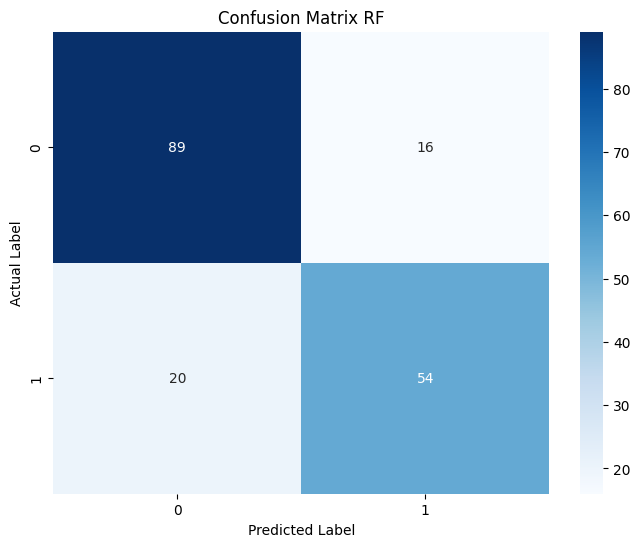

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix RF')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [29]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred = ad.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


[[89 16]
 [20 54]]
0.7988826815642458


In [30]:
gd = GradientBoostingClassifier()
gd.fit(x_train,y_train)
y_pred = gd.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[93 12]
 [19 55]]
0.8268156424581006


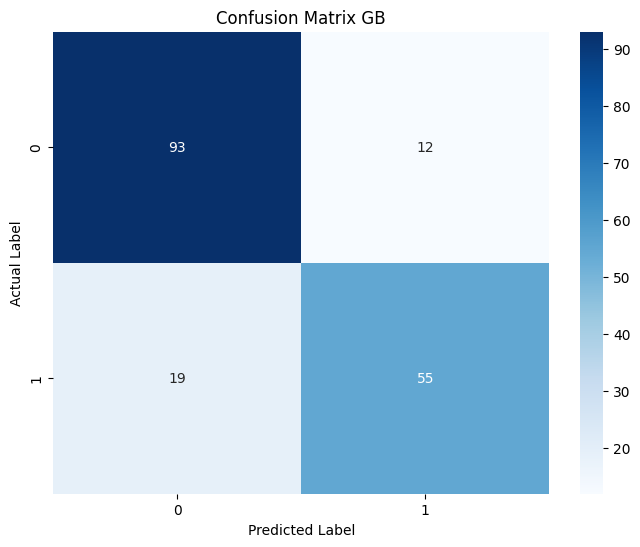

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix GB')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

<h2> Now use balanced </h2>

In [32]:
lg = LogisticRegression(class_weight={0:1,1:2})
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[79 26]
 [10 64]]
0.7988826815642458


In [33]:
svc = SVC(class_weight={0:1,1:1.5})
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[87 18]
 [34 40]]
0.7094972067039106


In [34]:
dt = DecisionTreeClassifier(class_weight={0:1,1:9})
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[83 22]
 [20 54]]
0.7653631284916201


In [35]:
rf = RandomForestClassifier(class_weight={0:1,1:50})
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) #18,19

[[92 13]
 [19 55]]
0.8212290502793296


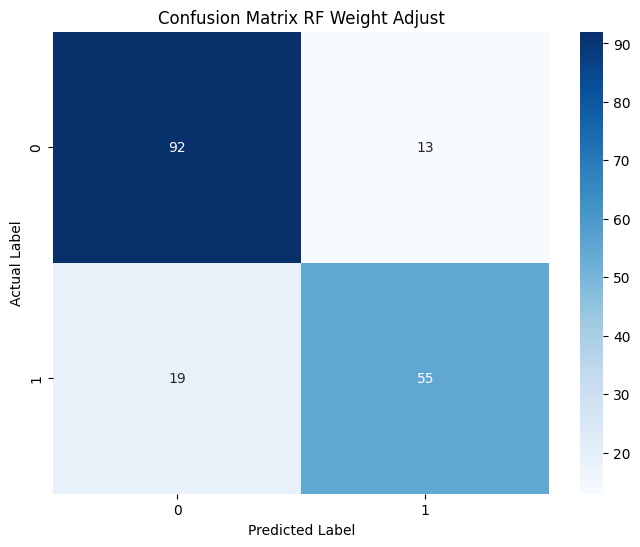

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix RF Weight Adjust')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [37]:
brf = BalancedRandomForestClassifier()
brf.fit(x_train,y_train)
y_pred = brf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)) #18,19

[[84 21]
 [14 60]]
0.8044692737430168


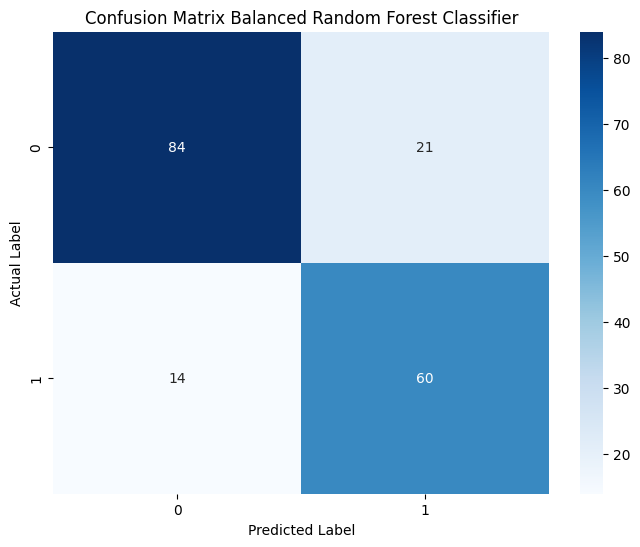

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Balanced Random Forest Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

<h1> Lets Downsample </h1>

In [39]:
ds = RandomUnderSampler(random_state=42)
x_train_ds,y_train_ds = ds.fit_resample(x_train,y_train)

In [40]:
lr = LogisticRegression()
lr.fit(x_train_ds,y_train_ds)
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[81 24]
 [10 64]]
0.8100558659217877


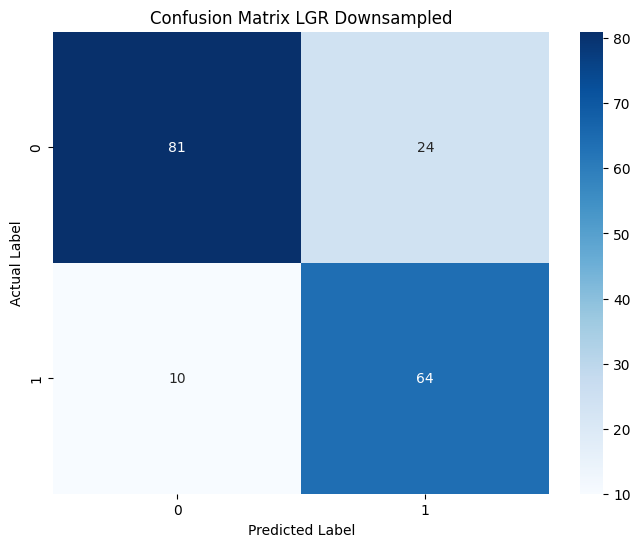

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix LGR Downsampled')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [42]:
svc = SVC()
svc.fit(x_train_ds,y_train_ds)
y_pred = svc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[77 28]
 [24 50]]
0.7094972067039106


In [43]:
dt = DecisionTreeClassifier()
dt.fit(x_train_ds,y_train_ds)
y_pred = dt.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[78 27]
 [14 60]]
0.770949720670391


In [44]:
rf = RandomForestClassifier()
rf.fit(x_train_ds,y_train_ds)
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[81 24]
 [15 59]]
0.7821229050279329


In [45]:
ad = AdaBoostClassifier()
ad.fit(x_train_ds,y_train_ds)
y_pred = ad.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[79 26]
 [14 60]]
0.776536312849162


In [46]:
gb = GradientBoostingClassifier()
gb.fit(x_train_ds,y_train_ds)
y_pred = gb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[87 18]
 [18 56]]
0.7988826815642458


In [47]:
from sklearn.ensemble import StackingClassifier
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lr',LogisticRegression(class_weight={0:1,1:2}))

]

# Meta learner
meta_learner = LogisticRegression()

# Stacking Classifier
stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    passthrough=False  # if True, meta learner also gets original features
)

In [48]:
stack.fit(x_train_ds,y_train_ds)
y_pred = stack.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
#

[[89 16]
 [11 63]]
0.8491620111731844


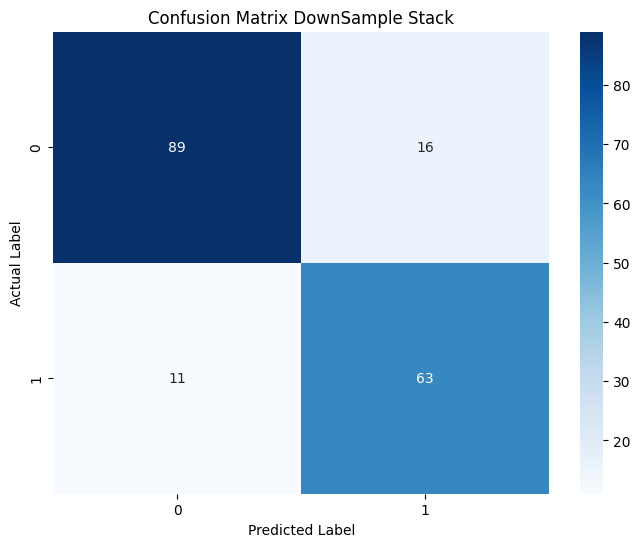

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix DownSample Stack')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lr', LogisticRegression(class_weight={0:1,1:2}, max_iter=1000, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('nb', GaussianNB())
]

# Meta learner (stronger than LogisticRegression)
meta_learner = RidgeClassifier()

# Stacking Classifier
stack2 = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    passthrough=True,   # let meta-learner see raw features + base predictions
    n_jobs=-1
)

Smote

In [51]:
sm = SMOTE(random_state=42)
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)

In [52]:
lg = LogisticRegression()
lg.fit(x_train_sm,y_train_sm)
y_pred = lg.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[84 21]
 [14 60]]
0.8044692737430168


In [53]:
svc = SVC()
svc.fit(x_train_sm,y_train_sm)
y_pred = svc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[76 29]
 [22 52]]
0.7150837988826816


In [54]:
rf = RandomForestClassifier()
rf.fit(x_train_sm,y_train_sm)
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[84 21]
 [16 58]]
0.7932960893854749


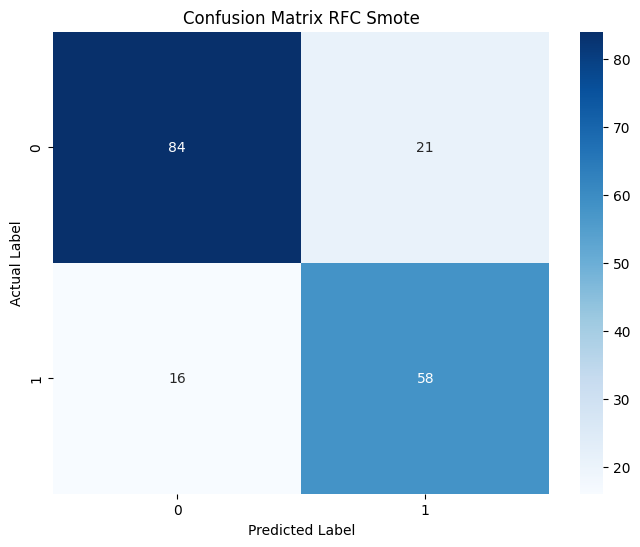

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix RFC Smote')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [56]:
dt = DecisionTreeClassifier()
dt.fit(x_train_sm,y_train_sm)
y_pred = dt.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[84 21]
 [22 52]]
0.7597765363128491


In [57]:
ad = AdaBoostClassifier()
ad.fit(x_train_sm,y_train_sm)
y_pred = ad.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[84 21]
 [17 57]]
0.7877094972067039


In [58]:
gb = GradientBoostingClassifier()
gb.fit(x_train_sm,y_train_sm)
y_pred = gb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[93 12]
 [20 54]]
0.8212290502793296


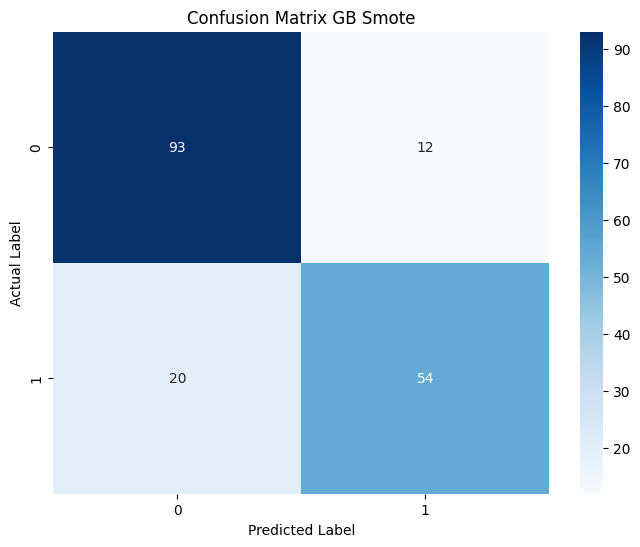

In [59]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix GB Smote')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [60]:
stack.fit(x_train_sm,y_train_sm)
y_pred = stack.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
#

[[91 14]
 [18 56]]
0.8212290502793296


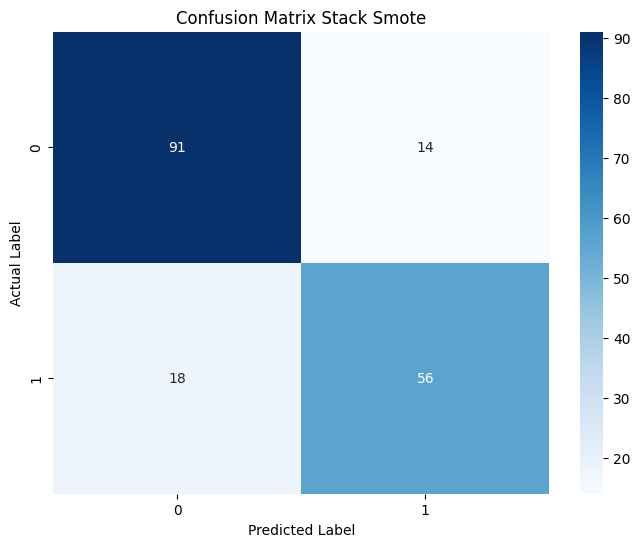

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Stack Smote')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [62]:
stack2.fit(x_train_sm,y_train_sm)
y_pred = stack2.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
#

[[93 12]
 [21 53]]
0.8156424581005587


<h1> Upsampling </h1>

In [63]:
ups = RandomOverSampler(random_state=42)
x_train_ups,y_train_ups = ups.fit_resample(x_train,y_train)

In [64]:
lg = LogisticRegression()
lg.fit(x_train_ups,y_train_ups)
y_pred = lg.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[84 21]
 [10 64]]
0.8268156424581006


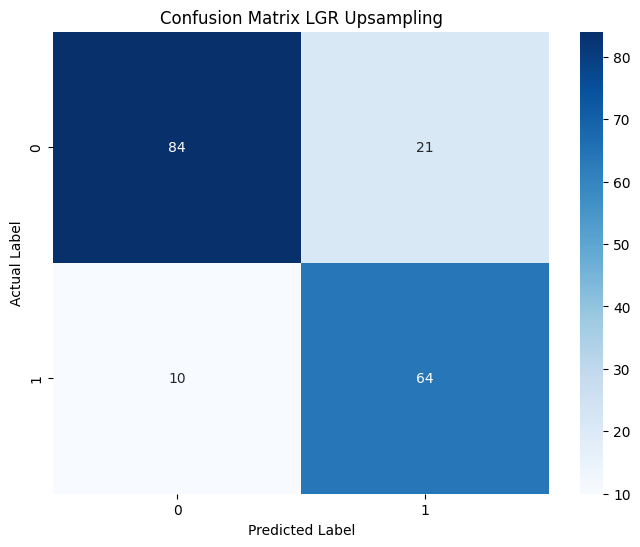

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix LGR Upsampling')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [66]:
svc = SVC()
svc.fit(x_train_ups,y_train_ups)
y_pred = svc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[77 28]
 [21 53]]
0.7262569832402235


In [67]:
dt = DecisionTreeClassifier()
dt.fit(x_train_ups,y_train_ups)
y_pred = dt.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[83 22]
 [20 54]]
0.7653631284916201


In [68]:
rf = RandomForestClassifier()
rf.fit(x_train_ups,y_train_ups)
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[83 22]
 [17 57]]
0.7821229050279329


In [69]:
ad = AdaBoostClassifier()
ad.fit(x_train_ups,y_train_ups)
y_pred = ad.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[77 28]
 [15 59]]
0.7597765363128491


In [70]:
gb = GradientBoostingClassifier()
gb.fit(x_train_ups,y_train_ups)
y_pred = gb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[87 18]
 [18 56]]
0.7988826815642458


In [71]:
stack.fit(x_train_ups,y_train_ups)
y_pred = stack.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[87 18]
 [19 55]]
0.7932960893854749
